In [32]:
import pandas as pd
import os
import warnings

warnings.filterwarnings("ignore")

In [33]:
data = pd.read_csv('./data/Monkeypox.csv')

In [34]:
data

,Test ID,Systemic Illness,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Red blood cells count,White blood cells count,Home ownership,Age,Month of Birth,Health Insurance,Sexually Transmitted Infection,MPOX PCR Result
0,AA0021,NaN,0.0,0.0,1,1.0,1,0,1.0,0.0,5363690,9382,1,37,10,0,0.0,Negative
1,AA0022,Fever,1.0,1.0,0,1.0,1,0,0.0,1.0,5797376,7891,0,24,7,1,0.0,Positive
2,AA0023,Fever,1.0,0.0,1,1.0,0,0,0.0,1.0,4509503,9424,0,34,11,1,0.0,Positive
3,AA0024,NaN,0.0,1.0,0,0.0,0,1,1.0,1.0,4613306,4608,1,40,3,0,0.0,Positive
4,AA0025,Swollen Lymph Nodes,3.0,1.0,1,1.0,0,0,1.0,1.0,5423126,10668,1,36,8,0,0.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,AH33692,NaN,0.0,1.0,1,0.0,1,1,0.0,0.0,5774935,9537,1,56,1,0,1.0,Positive
24996,AH33693,Fever,1.0,0.0,1,1.0,0,1,1.0,1.0,4719924,7596,1,50,10,1,1.0,Positive
24997,AH33694,NaN,0.0,1.0,1,0.0,0,1,1.0,0.0,4254616,10949,0,24,12,1,0.0,Positive
24998,AH33695,Swollen Lymph Nodes,3.0,0.0,1,0.0,1,1,1.0,0.0,5440155,6006,1,56,9,1,0.0,Negative


In [35]:
data.shape

(25000, 18)

In [36]:
data.isnull().sum()

Test ID                              0
Systemic Illness                  6216
Encoded Systemic Illness             2
Rectal Pain                          3
Sore Throat                          0
Penile Oedema                        6
Oral Lesions                         4
Solitary Lesion                      0
Swollen Tonsils                      7
HIV Infection                        5
Red blood cells count                0
White blood cells count              0
Home ownership                       0
Age                                 36
Month of Birth                       0
Health Insurance                     0
Sexually Transmitted Infection       4
MPOX PCR Result                      0
dtype: int64

In [37]:
data.columns

Index(['Test ID', 'Systemic Illness', 'Encoded Systemic Illness',
       'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions',
       'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Red blood cells count', 'White blood cells count', 'Home ownership',
       'Age', 'Month of Birth', 'Health Insurance',
       'Sexually Transmitted Infection', 'MPOX PCR Result'],
      dtype='object')

# Data pre-processing

Test ID: It's just an identifier, it doesn’t add value to the prediction or analysis. Removing it is typically a good move unless it's needed for some kind of unique reference.

Systemic Illness: This column is redundant because you already have Encoded Systemic Illness, removing it is fine. If it's not redundant, check if it holds valuable information.

White blood cells count / Red blood cells count: Blood tests are expensive or not easily accessible, removing these features can make the model more scalable and accessible, especially in resource-limited settings.

Home ownership: This could be useful in socioeconomic analysis but may be irrelevant for a medical condition like Monkeypox unless you are analyzing socioeconomic factors. If irrelevant, removing it is reasonable.

Health Insurance: Similar to Home ownership, it depends on the context. Focusing strictly on clinical features, it might not be important, but it could indicate access to healthcare, which might impact outcomes.

In [38]:
df = data.drop(['Test ID', 'Systemic Illness', 'White blood cells count', 'Red blood cells count', 'Home ownership', 'Health Insurance', 'Month of Birth'], axis=1)

In [39]:
df

,Encoded Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Age,Sexually Transmitted Infection,MPOX PCR Result
0,0.0,0.0,1,1.0,1,0,1.0,0.0,37,0.0,Negative
1,1.0,1.0,0,1.0,1,0,0.0,1.0,24,0.0,Positive
2,1.0,0.0,1,1.0,0,0,0.0,1.0,34,0.0,Positive
3,0.0,1.0,0,0.0,0,1,1.0,1.0,40,0.0,Positive
4,3.0,1.0,1,1.0,0,0,1.0,1.0,36,0.0,Positive
...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,1.0,1,0.0,1,1,0.0,0.0,56,1.0,Positive
24996,1.0,0.0,1,1.0,0,1,1.0,1.0,50,1.0,Positive
24997,0.0,1.0,1,0.0,0,1,1.0,0.0,24,0.0,Positive
24998,3.0,0.0,1,0.0,1,1,1.0,0.0,56,0.0,Negative


In [40]:
# Replace non-numeric values with NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Filter out invalid ages (e.g., Age should be between 1 and 120)
df = df[(df['Age'] > 0) & (df['Age'] <= 120)]

# After cleaning, you can check the unique values again
print(df['Age'].unique())

[37. 24. 34. 40. 36. 30. 23. 41. 32. 46. 27. 47. 53. 31. 25. 26. 52. 51.
 56. 39. 61. 35. 50. 58. 33. 28. 45. 59. 38. 57. 54. 55. 43. 60. 42. 44.
 48. 49. 29.]


In [41]:
# Replace NaN values in each column with the mode of that column
for column in df.columns:
    mode_value = df[column].mode()[0]  # Get the mode of the column
    df[column].fillna(mode_value, inplace=True)  # Replace NaN with the mode


In [42]:
for column in df.columns:
    print(f"Unique values in column '{column}': {df[column].unique()}")

Unique values in column 'Encoded Systemic Illness': [0. 1. 3. 2.]
Unique values in column 'Rectal Pain': [0. 1.]
Unique values in column 'Sore Throat': [1 0]
Unique values in column 'Penile Oedema': [1. 0.]
Unique values in column 'Oral Lesions': ['1' '0' 'YES' 'No']
Unique values in column 'Solitary Lesion': [0 1]
Unique values in column 'Swollen Tonsils': [1. 0.]
Unique values in column 'HIV Infection': [0. 1.]
Unique values in column 'Age': [37. 24. 34. 40. 36. 30. 23. 41. 32. 46. 27. 47. 53. 31. 25. 26. 52. 51.
 56. 39. 61. 35. 50. 58. 33. 28. 45. 59. 38. 57. 54. 55. 43. 60. 42. 44.
 48. 49. 29.]
Unique values in column 'Sexually Transmitted Infection': [0. 1.]
Unique values in column 'MPOX PCR Result': ['Negative' 'Positive']


In [43]:
def convert_results(result):
    if result == 'Positive':
        return 1
    elif result == 'Negative':
        return 0
    else:
        return None

df['MPOX PCR Result'] = df['MPOX PCR Result'].map(convert_results)

In [44]:
df['Oral Lesions'] = df['Oral Lesions'].astype(str).str.strip().str.lower()
df['Oral Lesions'] = df['Oral Lesions'].replace({'no': 0, 'yes': 1})
df['Oral Lesions'] = df['Oral Lesions'].apply(lambda x: 1 if x in ['1', 'true'] else (0 if x in ['0', 'false'] else x))
mode_value = df['Oral Lesions'].mode()[0]
df['Oral Lesions'] = df['Oral Lesions'].fillna(mode_value)
print(df['Oral Lesions'].unique())

[1 0]


In [45]:
for variable in df.columns:
    print(df[variable].value_counts())
    print("~"*50)

Encoded Systemic Illness
1.0    6376
3.0    6243
0.0    6200
2.0    6140
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rectal Pain
0.0    12632
1.0    12327
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Sore Throat
1    12532
0    12427
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Penile Oedema
1.0    12589
0.0    12370
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Oral Lesions
0    12491
1    12468
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Solitary Lesion
1    12503
0    12456
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Swollen Tonsils
1.0    12511
0.0    12448
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
HIV Infection
1.0    12566
0.0    12393
Name: count, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Age
47.0    698
33.0    684
50.0    683
58.0

In [46]:
df.to_csv("./data/mo_processed.csv", index=False)

# EDA analysis

In [47]:
df.columns

Index(['Encoded Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Age', 'Sexually Transmitted Infection',
       'MPOX PCR Result'],
      dtype='object')

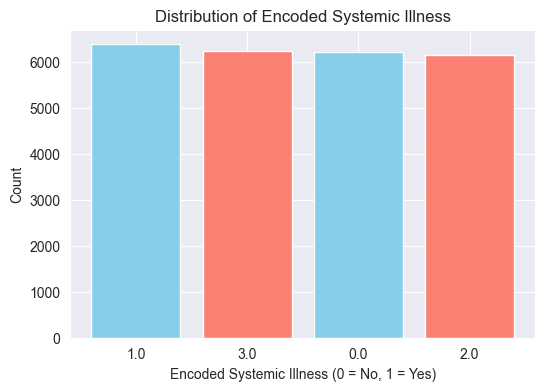

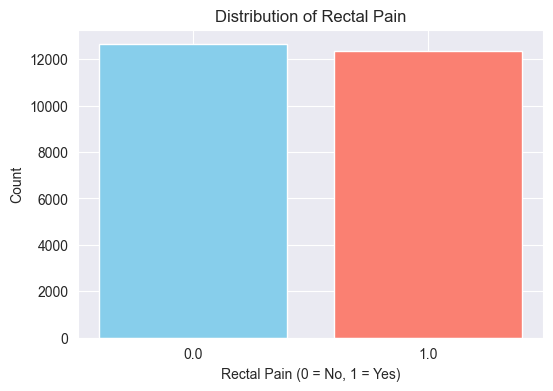

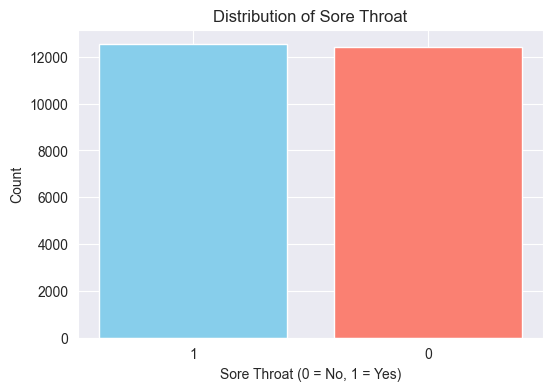

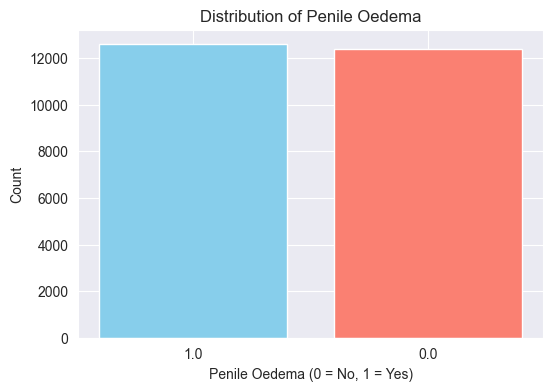

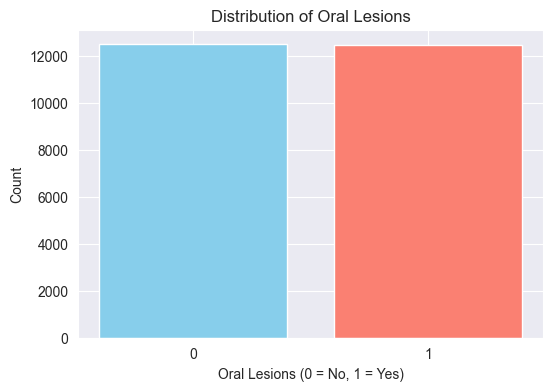

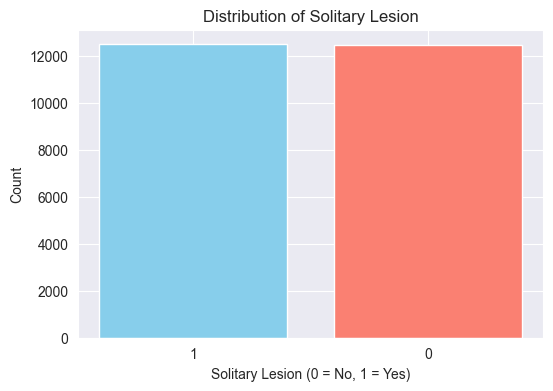

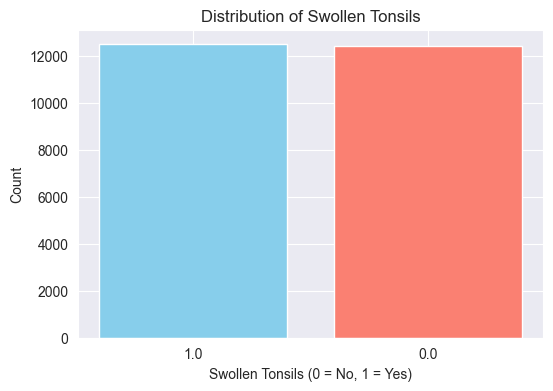

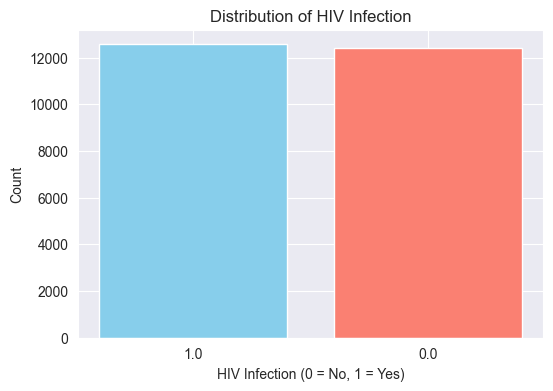

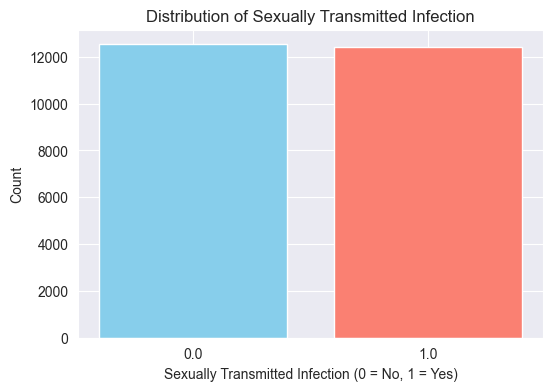

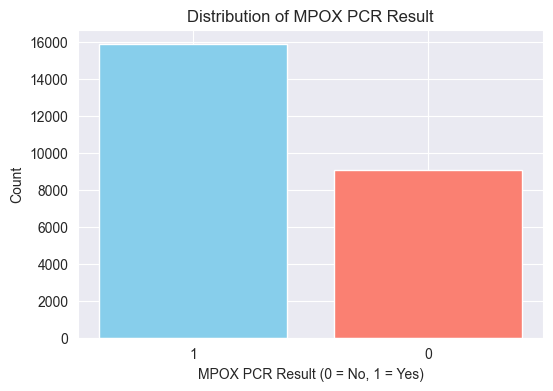

In [48]:
import matplotlib.pyplot as plt

# Define a function to create bar charts for each binary column
def plot_binary_distribution(df, column_name):
    value_counts = df[column_name].value_counts()
    plt.figure(figsize=(6, 4))
    plt.bar(value_counts.index.astype(str), value_counts.values, color=['skyblue', 'salmon'])
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(f'{column_name} (0 = No, 1 = Yes)')
    plt.ylabel('Count')
    plt.show()

# List of binary columns
binary_columns = ['Encoded Systemic Illness', 'Rectal Pain', 'Sore Throat',
                  'Penile Oedema', 'Oral Lesions', 'Solitary Lesion',
                  'Swollen Tonsils', 'HIV Infection',
                  'Sexually Transmitted Infection', 'MPOX PCR Result']

# Plot for each binary column in the DataFrame
for col in binary_columns:
    plot_binary_distribution(df, col)


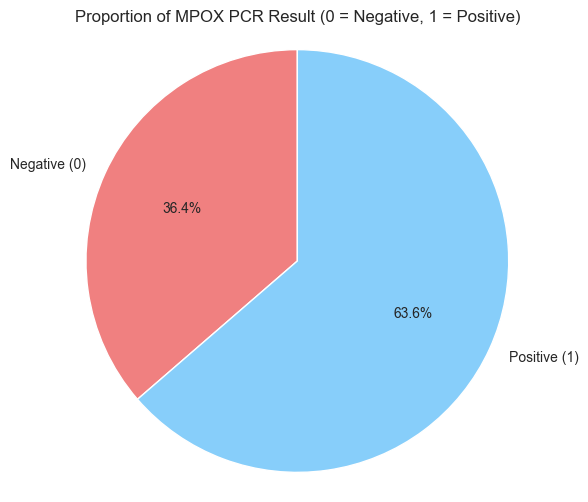

In [49]:
import matplotlib.pyplot as plt

# Sample data for MPOX PCR Result (using actual counts from df)
mpox_pcr_counts = df['MPOX PCR Result'].value_counts()

# Create a pie chart for MPOX PCR Result
labels = ['Negative (0)', 'Positive (1)']
sizes = [mpox_pcr_counts[0], mpox_pcr_counts[1]]  # Access counts with integers, not strings
colors = ['lightcoral', 'lightskyblue']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of MPOX PCR Result (0 = Negative, 1 = Positive)')
plt.show()


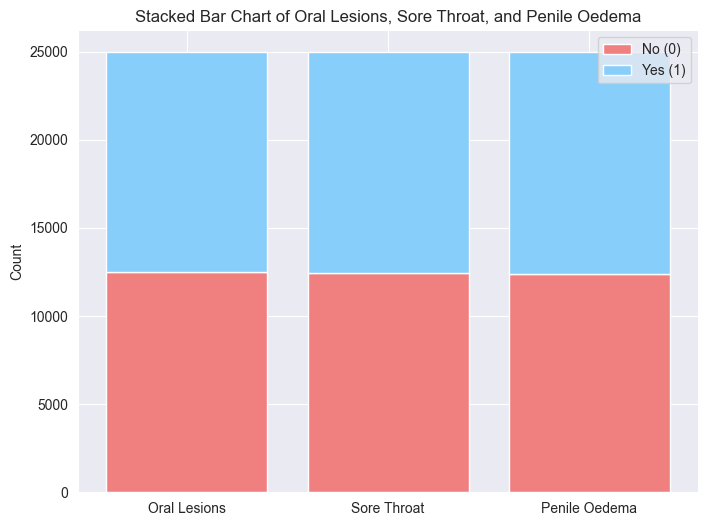

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Select the relevant columns
symptoms = ['Oral Lesions', 'Sore Throat', 'Penile Oedema']

# Calculate the counts for each binary variable (0 and 1) in each symptom
counts = {}
for symptom in symptoms:
    counts[symptom] = df[symptom].value_counts()

# Create a stacked bar chart
labels = ['0 (No)', '1 (Yes)']  # Binary categories
x = np.arange(len(symptoms))  # Label locations

# Extract the counts for each symptom for 0 and 1
no_counts = [counts[symptom][0] for symptom in symptoms]
yes_counts = [counts[symptom][1] for symptom in symptoms]

# Plotting the stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar(x, no_counts, label='No (0)', color='lightcoral')
plt.bar(x, yes_counts, bottom=no_counts, label='Yes (1)', color='lightskyblue')

# Add labels and title
plt.xticks(x, symptoms)
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Oral Lesions, Sore Throat, and Penile Oedema')
plt.legend()

# Show the plot
plt.show()


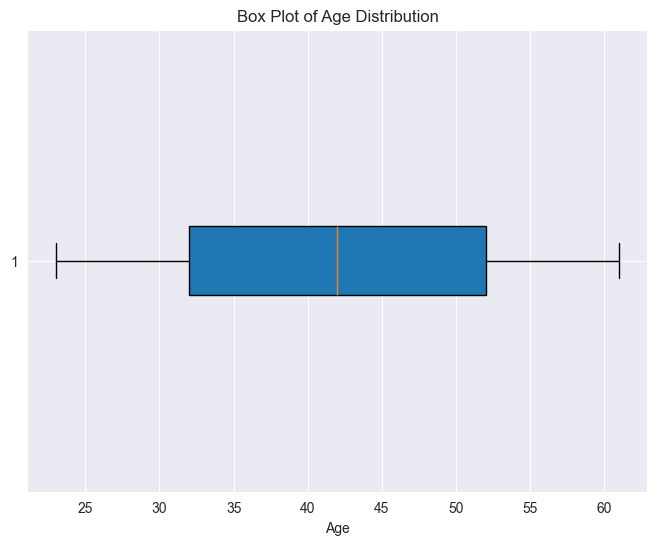

In [51]:
# Convert Age column to numeric and filter out invalid ages
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df_cleaned = df[(df['Age'] > 0) & (df['Age'] <= 120)]  # Filter valid age range

# Create a box plot to show the distribution of ages after cleaning
plt.figure(figsize=(8, 6))
plt.boxplot(df_cleaned['Age'].dropna(), vert=False, patch_artist=True)
plt.title('Box Plot of Age Distribution')
plt.xlabel('Age')
plt.show()

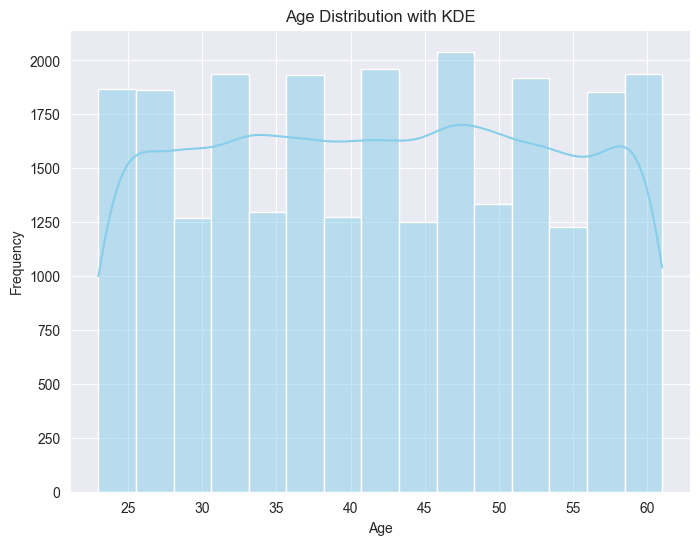

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Age column to numeric and filter out invalid ages
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df_cleaned = df[(df['Age'] > 0) & (df['Age'] <= 120)]  # Filter valid age range

# Create a histogram and KDE plot for Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Age'].dropna(), kde=True, bins=15, color='skyblue')
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The histogram bars are quite similar in height, suggesting that there is no significant skew or concentration of ages in one particular range. The data appears to be fairly evenly distributed between the ages of 25 and 60.

The KDE line does not show any extreme peaks or dips, which implies that there are no strong outliers or age groups that dominate the distribution.

The histogram and KDE curve both indicate that the data starts from about age 25 and extends up to around 60 years. There are no very young or very old individuals in this dataset, which aligns with your cleaned data (where you removed unrealistic ages such as 0 and 150).


# Models

In [53]:
from sklearn.preprocessing import StandardScaler

# Splitting the data into features and target
X = df.drop(['MPOX PCR Result'], axis=1)
y = df['MPOX PCR Result']

# Encoding categorical variables
# X_encoded = pd.get_dummies(X, drop_first=True) # Not required.

scaler = StandardScaler()
X['Age'] = scaler.fit_transform(X[['Age']])

In [54]:
# One-hot encode the 'Encoded Systemic Illness' column
X = pd.get_dummies(X, columns=['Encoded Systemic Illness'], drop_first=True)
X

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Age,Sexually Transmitted Infection,Encoded Systemic Illness_1.0,Encoded Systemic Illness_2.0,Encoded Systemic Illness_3.0
0,0.0,1,1.0,1,0,1.0,0.0,-0.451833,0.0,False,False,False
1,1.0,0,1.0,1,0,0.0,1.0,-1.613520,0.0,True,False,False
2,0.0,1,1.0,0,0,0.0,1.0,-0.719914,0.0,True,False,False
3,1.0,0,0.0,0,1,1.0,1.0,-0.183751,0.0,False,False,False
4,1.0,1,1.0,0,0,1.0,1.0,-0.541193,0.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1.0,1,0.0,1,1,0.0,0.0,1.246017,1.0,False,False,False
24996,0.0,1,1.0,0,1,1.0,1.0,0.709854,1.0,True,False,False
24997,1.0,1,0.0,0,1,1.0,0.0,-1.613520,0.0,False,False,False
24998,0.0,1,0.0,1,1,1.0,0.0,1.246017,0.0,False,False,True


In [55]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to balance the classes on the training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# # Standardizing the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_resampled)
# X_test_scaled = scaler.transform(X_test)

X_train_scaled = X_train_resampled
X_test_scaled = X_test

#Print the shapes of the resulting datasets
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("y_test shape:", y_test.shape)

# Print the distribution of target classes in train and test sets
print("\nDistribution of classes in y_train_resampled:")
print(y_train_resampled.value_counts(normalize=True))

print("\nDistribution of classes in y_test:")
print(y_test.value_counts(normalize=True))


X_train_scaled shape: (22240, 12)
X_test_scaled shape: (7488, 12)
y_train_resampled shape: (22240,)
y_test shape: (7488,)

Distribution of classes in y_train_resampled:
MPOX PCR Result
1    0.5
0    0.5
Name: proportion, dtype: float64

Distribution of classes in y_test:
MPOX PCR Result
1    0.636485
0    0.363515
Name: proportion, dtype: float64


In [56]:
X_train_scaled

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Age,Sexually Transmitted Infection,Encoded Systemic Illness_1.0,Encoded Systemic Illness_2.0,Encoded Systemic Illness_3.0
0,1.0,1,0.0,0,1,1.0,0.000000,0.352412,1.0,False,False,True
1,1.0,1,0.0,1,0,1.0,1.000000,0.799214,1.0,False,False,True
2,0.0,0,0.0,1,1,0.0,0.000000,0.888575,1.0,False,False,False
3,1.0,1,1.0,0,1,1.0,1.000000,-1.166717,0.0,True,False,False
4,1.0,0,1.0,0,1,0.0,1.000000,0.799214,1.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
22235,1.0,1,1.0,0,1,0.0,0.000000,1.316103,0.0,True,False,False
22236,0.0,0,0.0,1,1,0.0,0.000000,0.290586,1.0,False,False,True
22237,0.0,1,1.0,1,0,0.0,1.000000,-0.785761,1.0,False,False,True
22238,0.0,0,1.0,0,0,0.0,0.697723,1.424738,0.0,False,False,False


In [57]:
X_train_scaled.columns

Index(['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions',
       'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Age',
       'Sexually Transmitted Infection', 'Encoded Systemic Illness_1.0',
       'Encoded Systemic Illness_2.0', 'Encoded Systemic Illness_3.0'],
      dtype='object')

In [58]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbours': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Naïve Bayes': GaussianNB(),
    'XGB Classifier': XGBClassifier(random_state=42)
}

results = {}
confusion_matrices = {}
roc_data = {}
cv_results = {}

# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Train, cross-validate, and evaluate models
for name, model in models.items():
    # Cross-validation
    scores = cross_validate(model, X_train_scaled, y_train_resampled, cv=3, scoring=scoring)
    cv_results[name] = {
        'Accuracy': scores['test_accuracy'].mean(),
        'AUC-ROC': scores['test_roc_auc'].mean(),
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1 Score': scores['test_f1'].mean()
    }

    # Fit model to the entire training data and evaluate on the test set
    model.fit(X_train_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_prob) if y_prob is not None else None,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

    # Compute ROC curve and AUC
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_data[name] = {
            'fpr': fpr,
            'tpr': tpr,
            'auc': roc_auc_score(y_test, y_prob)
        }

    # Store the confusion matrix in a dictionary
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)


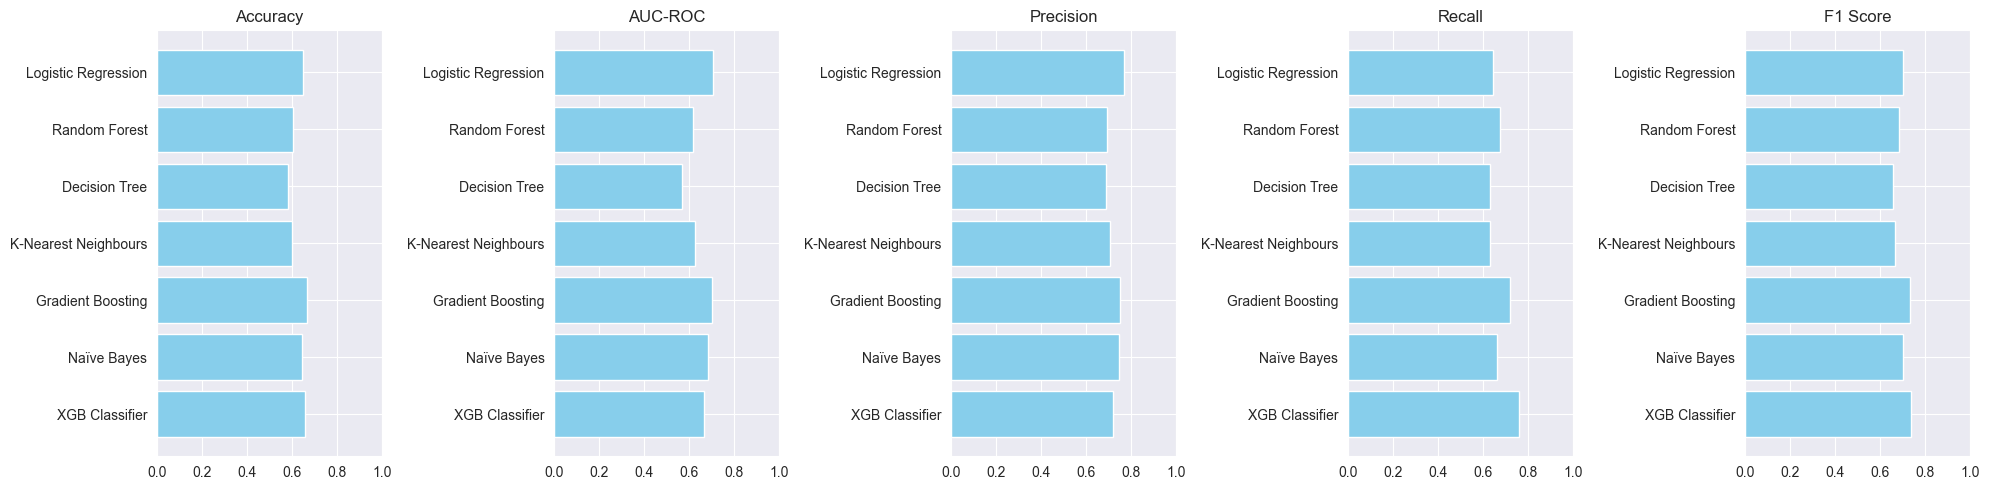

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Extract metrics
metrics = ['Accuracy', 'AUC-ROC', 'Precision', 'Recall', 'F1 Score']
n_metrics = len(metrics)

# Prepare data for plotting
model_names = list(results.keys())
scores = np.array([[results[model][metric] for metric in metrics] for model in model_names])

# Plot
fig, axes = plt.subplots(1, n_metrics, figsize=(20, 5))

for i, metric in enumerate(metrics):
    axes[i].barh(model_names, scores[:, i], color='skyblue')
    axes[i].set_title(metric)
    axes[i].set_xlim(0, 1)
    axes[i].invert_yaxis()

plt.tight_layout()
plt.savefig(os.path.join('plots', 'extract-metrics'))
plt.show()

In [60]:
metrics = ['Accuracy', 'AUC-ROC', 'Precision', 'Recall', 'F1 Score']

model_names = list(results.keys())
scores = np.array([[results[model][metric] for metric in metrics] for model in model_names])

df_results = pd.DataFrame(scores, index=model_names, columns=metrics)

df_results

,Accuracy,AUC-ROC,Precision,Recall,F1 Score
Logistic Regression,0.647837,0.703769,0.766592,0.642258,0.698938
Random Forest,0.602698,0.617961,0.692456,0.676039,0.684149
Decision Tree,0.582399,0.568544,0.687572,0.630298,0.657690
K-Nearest Neighbours,0.597623,0.623438,0.706381,0.629459,0.665705
Gradient Boosting,0.666934,0.701064,0.748795,0.717373,0.732748
Naïve Bayes,0.642228,0.685540,0.747216,0.661771,0.701903
XGB Classifier,0.655582,0.667175,0.717266,0.757449,0.736810


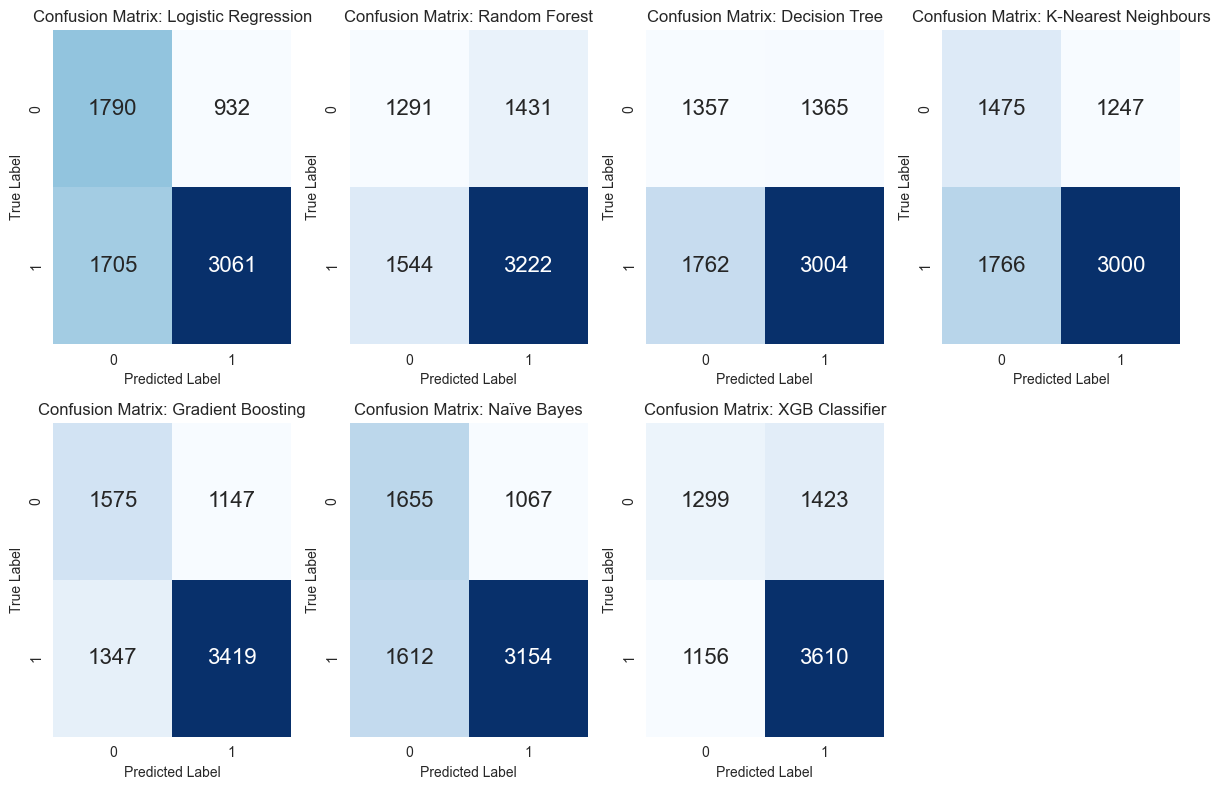

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the plot size for all confusion matrices
plt.figure(figsize=(12, 8))

# Plot each confusion matrix
for i, (name, cm) in enumerate(confusion_matrices.items()):
    plt.subplot(2, 4, i + 1)  # Adjust the grid size based on the number of models
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})  # Increase the font size here
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plt.tight_layout()
plt.savefig(os.path.join('plots', f'Confusion-Matrix'))

plt.show()

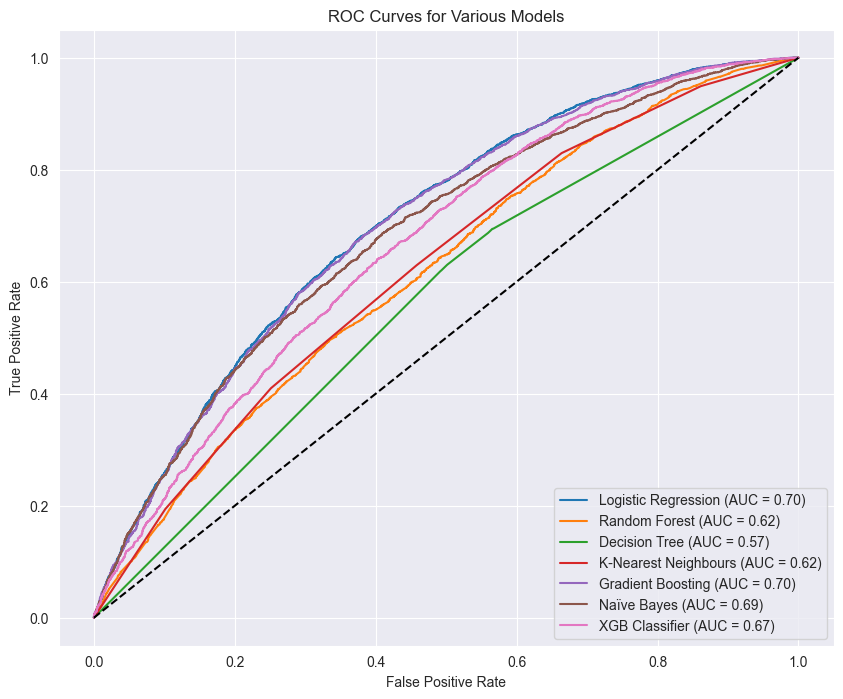

In [76]:
import matplotlib.pyplot as plt

# Initialize the plot
plt.figure(figsize=(10, 8))

# Plot each ROC curve
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], label=f'{name} (AUC = {data["auc"]:.2f})')

# Plot the 45-degree line
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

# Customize the plot
plt.title('ROC Curves for Various Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)

plt.savefig(os.path.join('plots', 'ROC-Curve-for-Various-Models.png'))
# Show the plot
plt.show()


In [63]:
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n" + "="*30 + "\n")

Model: Logistic Regression
Accuracy: 0.6478
AUC-ROC: 0.7038
Precision: 0.7666
Recall: 0.6423
F1 Score: 0.6989


Model: Random Forest
Accuracy: 0.6027
AUC-ROC: 0.6180
Precision: 0.6925
Recall: 0.6760
F1 Score: 0.6841


Model: Decision Tree
Accuracy: 0.5824
AUC-ROC: 0.5685
Precision: 0.6876
Recall: 0.6303
F1 Score: 0.6577


Model: K-Nearest Neighbours
Accuracy: 0.5976
AUC-ROC: 0.6234
Precision: 0.7064
Recall: 0.6295
F1 Score: 0.6657


Model: Gradient Boosting
Accuracy: 0.6669
AUC-ROC: 0.7011
Precision: 0.7488
Recall: 0.7174
F1 Score: 0.7327


Model: Naïve Bayes
Accuracy: 0.6422
AUC-ROC: 0.6855
Precision: 0.7472
Recall: 0.6618
F1 Score: 0.7019


Model: XGB Classifier
Accuracy: 0.6556
AUC-ROC: 0.6672
Precision: 0.7173
Recall: 0.7574
F1 Score: 0.7368



In [64]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score

In [70]:
# Base models
base_models = [
    ('random_forest', GaussianNB()),
    ('gradient_boosting', GradientBoostingClassifier(random_state=42))
]

# Meta-model
meta_model = LogisticRegression(random_state=42)

# Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)


Stacking Model Accuracy: 0.667201
Stacking Model AUC-ROC: 0.698443
Stacking Model Precision: 0.749124
Stacking Model Recall: 0.717373
Stacking Model F1 Score: 0.732905


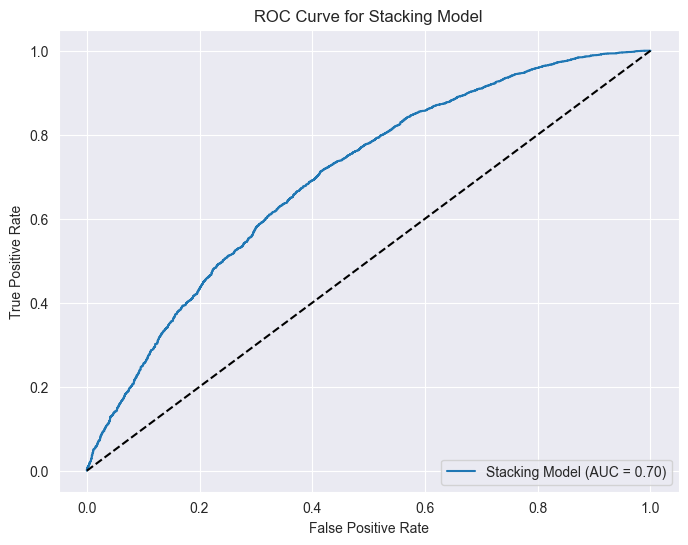

In [79]:
# Train the stacking model
stacking_model.fit(X_train_scaled, y_train_resampled)

# Predict on the test data
y_pred = stacking_model.predict(X_test_scaled)
y_prob = stacking_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Stacking Model Accuracy: {accuracy:.6f}")
print(f"Stacking Model AUC-ROC: {auc:.6f}")
print(f"Stacking Model Precision: {precision:.6f}")
print(f"Stacking Model Recall: {recall:.6f}")
print(f"Stacking Model F1 Score: {f1:.6f}")

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Stacking Model (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('ROC Curve for Stacking Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig(os.path.join('plots', 'ROC-Curve-for-Stacking-Model.png'))
plt.show()


AdaBoost AUC-ROC (cross-validation): 0.7110 (+/- 0.0202)

AdaBoost Model Performance on Test Set:
Accuracy: 0.6474
Precision: 0.7627
Recall: 0.6475
F1 Score: 0.7004
AUC-ROC: 0.7017


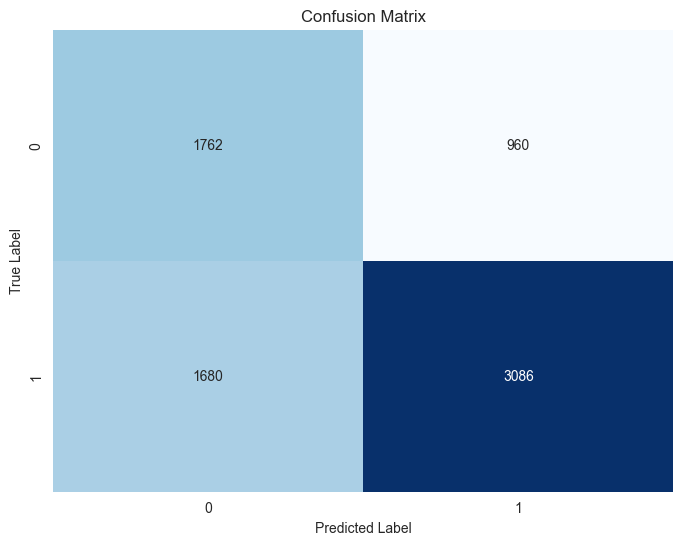

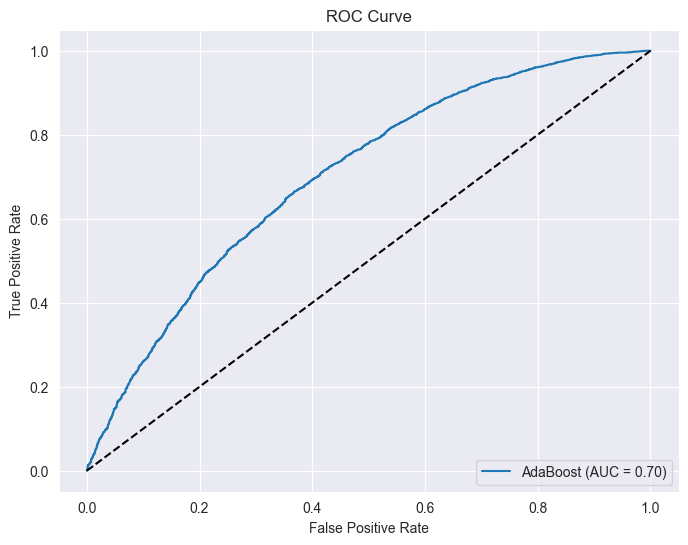

In [67]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize AdaBoost with Decision Tree as the weak learner
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Decision stump
    n_estimators=50,  # Number of weak learners to combine
    learning_rate=1.0,  # Learning rate shrinks the contribution of each classifier
    random_state=42
)

# Evaluate using cross-validation
ada_scores = cross_val_score(ada_model, X_train_scaled, y_train_resampled, cv=3, scoring='roc_auc')

# Print the cross-validation AUC-ROC score
print(f"AdaBoost AUC-ROC (cross-validation): {ada_scores.mean():.4f} (+/- {ada_scores.std():.4f})")

# Train the model on the full training data
ada_model.fit(X_train_scaled, y_train_resampled)

# Predict on the test set
y_pred = ada_model.predict(X_test_scaled)
y_prob = ada_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)

# Print the evaluation metrics
print(f"\nAdaBoost Model Performance on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AdaBoost (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Precision: 0.7566